In [1]:
import pathlib
from itertools import chain, product

import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo
from elyawy.constants import length_distributions, indel_models

plt.style.use('seaborn-v0_8-colorblind')

all_models = tuple("_".join(i) for i in (product(length_distributions, indel_models)))

In [3]:
dataset = 'eggnog'
corrected = True
REMOTE_PATH = pathlib.Path("/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/").resolve() # sys.argv[2]
REMOTE_PATH = REMOTE_PATH / dataset
all_outputs_path = pathlib.Path(REMOTE_PATH).resolve()
# all_outputs_path = chain(all_outputs_path.glob("*Primates*"),all_outputs_path.glob("*Rodent*"))

all_outputs_path = list(all_outputs_path.iterdir())



In [4]:
all_outputs_path

[PosixPath('/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/other_tests/benchmark/Bacillus_1ZD87'),
 PosixPath('/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/other_tests/benchmark/Brassicales_3HQ0R'),
 PosixPath('/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/other_tests/benchmark/Ciliophora_3ZBCQ'),
 PosixPath('/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/other_tests/benchmark/Drosophilidea_45P83'),
 PosixPath('/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user=elyawygoda/groups/pupko/elyawygoda/length_distributions/all_outputs/results_rerun/other_tests/benchmark/Paeruginosa_1YEJ1'),
 PosixPath('/run/user/1000/gvfs/sftp:host=power.tau.ac.il,user

In [123]:
def add_missing_models(df_: pd.DataFrame):
    for model in all_models:
        if not len(df_[df_.model == model]):
            missing_row = {col:0.0 for col in df_.columns}
            missing_row["model"] = model
            missing_row = pd.DataFrame(missing_row, index=[0])
            df_ = pd.concat([df_, missing_row])
    df_ = df_.set_index("model")
    df_= df_.fillna(0.0).astype('float')
    return df_

In [131]:
# all_outputs_path = pathlib.Path("../all_outputs/results_rerun",dataset).resolve()
all_outputs_path = [folder for folder in all_outputs_path if (folder / "epsilon_mahal_100000_.csv").exists()]


# sum_branches = []
# filtered_outputs_path = []
# for dir_name in all_outputs_path:
#     tree_path = (dir_name / f"{dir_name.stem}_NT.tree").resolve()
#     tree = Phylo.read(tree_path, 'newick')
#     sum_branch_lengths = tree.total_branch_length()
#     if sum_branch_lengths > 7:
#         sum_branches.append(sum_branch_lengths)
#         filtered_outputs_path.append(dir_name)

# all_outputs_path = filtered_outputs_path

abc_winner = []
duplicate_count = 0
for dir_name in all_outputs_path:
    if corrected:
        epsilon_results = pathlib.Path(dir_name, "epsilon_mahal_100000_.csv")
    else:
        epsilon_results = pathlib.Path(dir_name, "epsilon_mahal_100000_non_corrected.csv")
    temp_df = pd.read_csv(epsilon_results)
    temp_df["model"] = temp_df["length_distribution"] + "_" + temp_df["indel_model"]
    temp_df = temp_df.drop(columns=["length_distribution","indel_model"])
    temp_df = add_missing_models(temp_df)
    def get_max(x: pd.Series):
        sorted_x = x.sort_values(ascending=False)
        last_val = -1
        groups_ = []
        for key,val in sorted_x.items():
            if last_val != val:
                groups_.append([])
                last_val = val
            groups_[-1].append(key)
        return ",".join(groups_[0])
    abc_winner.append(temp_df.apply(get_max, axis=0))

corrected = "corrected" if corrected else "not_corrected"


    10    25   50  100    250    500   1000          model
0  0.9  0.84  0.7  0.6  0.580  0.538  0.494       zipf_sim
1  0.1  0.16  0.3  0.4  0.396  0.432  0.444       zipf_rim
2  0.0  0.00  0.0  0.0  0.008  0.006  0.011  geometric_rim
3  0.0  0.00  0.0  0.0  0.008  0.006  0.021  geometric_sim
4  0.0  0.00  0.0  0.0  0.004  0.002  0.006    poisson_rim
5  0.0  0.00  0.0  0.0  0.004  0.016  0.024    poisson_sim
    10   25    50   100    250    500   1000          model
0  0.8  0.8  0.76  0.74  0.716  0.634  0.639       zipf_sim
1  0.2  0.2  0.24  0.24  0.264  0.308  0.305       zipf_rim
2  0.0  0.0  0.00  0.02  0.012  0.016  0.011  geometric_rim
3  0.0  0.0  0.00  0.00  0.008  0.028  0.025    poisson_sim
4  0.0  0.0  0.00  0.00  0.000  0.014  0.019  geometric_sim
5  0.0  0.0  0.00  0.00  0.000  0.000  0.001    poisson_rim
    10   25    50  100    250    500   1000          model
0  1.0  1.0  0.94  0.9  0.864  0.842  0.810       zipf_sim
1  0.0  0.0  0.06  0.1  0.124  0.132  0.145      

In [132]:
new_df  = pd.concat(abc_winner, axis=1)
new_df.columns = [i.stem for i in all_outputs_path]
new_df

,Bacillus_1ZARG,Bacillus_1ZART,Bacillus_1ZAS4,Bacillus_1ZAXF,Bacillus_1ZAYH,Bacillus_1ZB8G,Bacillus_1ZB8K,Bacillus_1ZBRJ,Bacillus_1ZC1Z,Bacillus_1ZC31,...,Vibrionales_1XUED,Vibrionales_1XUGH,Vibrionales_1XUIU,Vibrionales_1XUQD,Vibrionales_1XUR3,Vibrionales_1XVEY,Vibrionales_1XVT4,Vibrionales_1XW2N,Vibrionales_1XW8K,Vibrionales_1Y2F6
10,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,zipf_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_rim,"geometric_sim,zipf_sim",zipf_rim
25,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,zipf_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_rim,zipf_sim,zipf_rim
50,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,geometric_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_rim,zipf_sim,zipf_rim
100,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,geometric_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_rim,geometric_sim,zipf_rim,geometric_sim,zipf_rim
250,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,geometric_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_rim,geometric_sim,zipf_rim,geometric_sim,zipf_rim
500,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,geometric_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_rim,geometric_sim,zipf_rim,geometric_sim,zipf_rim
1000,zipf_sim,zipf_sim,zipf_sim,zipf_sim,geometric_sim,zipf_sim,geometric_sim,zipf_sim,zipf_rim,zipf_sim,...,zipf_sim,zipf_rim,geometric_sim,zipf_sim,zipf_sim,zipf_rim,geometric_sim,zipf_rim,geometric_sim,zipf_rim


In [133]:
summary_res = new_df.apply(lambda x: x.value_counts(), axis=1)
summary_res = summary_res.fillna(0)
temp_df = summary_res.T

temp_df["model"] = temp_df.index
temp_df = temp_df.reset_index(level=0, drop=True)
temp_df = add_missing_models(temp_df)
temp_df = temp_df.T
temp_df.index.name = "index"
summary_res = temp_df
# temp_df["model"]

       10     25     50    100    250    500   1000  \
0    19.0   20.0   20.0   23.0   22.0   20.0   20.0   
1     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     5.0    0.0    0.0    1.0    0.0    0.0    0.0   
3     1.0    0.0    2.0    0.0    0.0    0.0    0.0   
4    45.0   49.0   53.0   51.0   56.0   58.0   59.0   
5     0.0    0.0    0.0    1.0    0.0    0.0    0.0   
6     2.0    0.0    0.0    0.0    0.0    0.0    0.0   
7     4.0    4.0    4.0    3.0    3.0    4.0    5.0   
8     2.0    2.0    2.0    2.0    1.0    3.0    4.0   
9   119.0  138.0  132.0  136.0  136.0  130.0  128.0   
10   26.0    1.0    4.0    3.0    0.0    1.0    0.0   
11  192.0  200.0  198.0  196.0  197.0  200.0  200.0   
12    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
13    0.0    1.0    1.0    0.0    1.0    0.0    0.0   

                          model  
0                 geometric_rim  
1   geometric_rim,geometric_sim  
2        geometric_rim,zipf_rim  
3        geometric_rim,zipf_sim  
4   

In [110]:
all_models

('zipf_sim',
 'zipf_rim',
 'geometric_sim',
 'geometric_rim',
 'poisson_sim',
 'poisson_rim')

In [134]:
# summary_res = summary_res[list(all_models)]
summary_res = summary_res.loc["100"]
summary_res/summary_res.sum() *100

model
geometric_rim                   5.528846
geometric_rim,geometric_sim     0.000000
geometric_rim,zipf_rim          0.240385
geometric_rim,zipf_sim          0.000000
geometric_sim                  12.259615
geometric_sim,zipf_rim          0.240385
geometric_sim,zipf_sim          0.000000
poisson_rim                     0.721154
poisson_sim                     0.480769
zipf_rim                       32.692308
zipf_rim,zipf_sim               0.721154
zipf_sim                       47.115385
zipf_sim,geometric_sim          0.000000
zipf_sim,zipf_rim               0.000000
Name: 100, dtype: float64

In [135]:
(summary_res/summary_res.sum() *100).to_csv(f"{dataset}_{corrected}.csv")

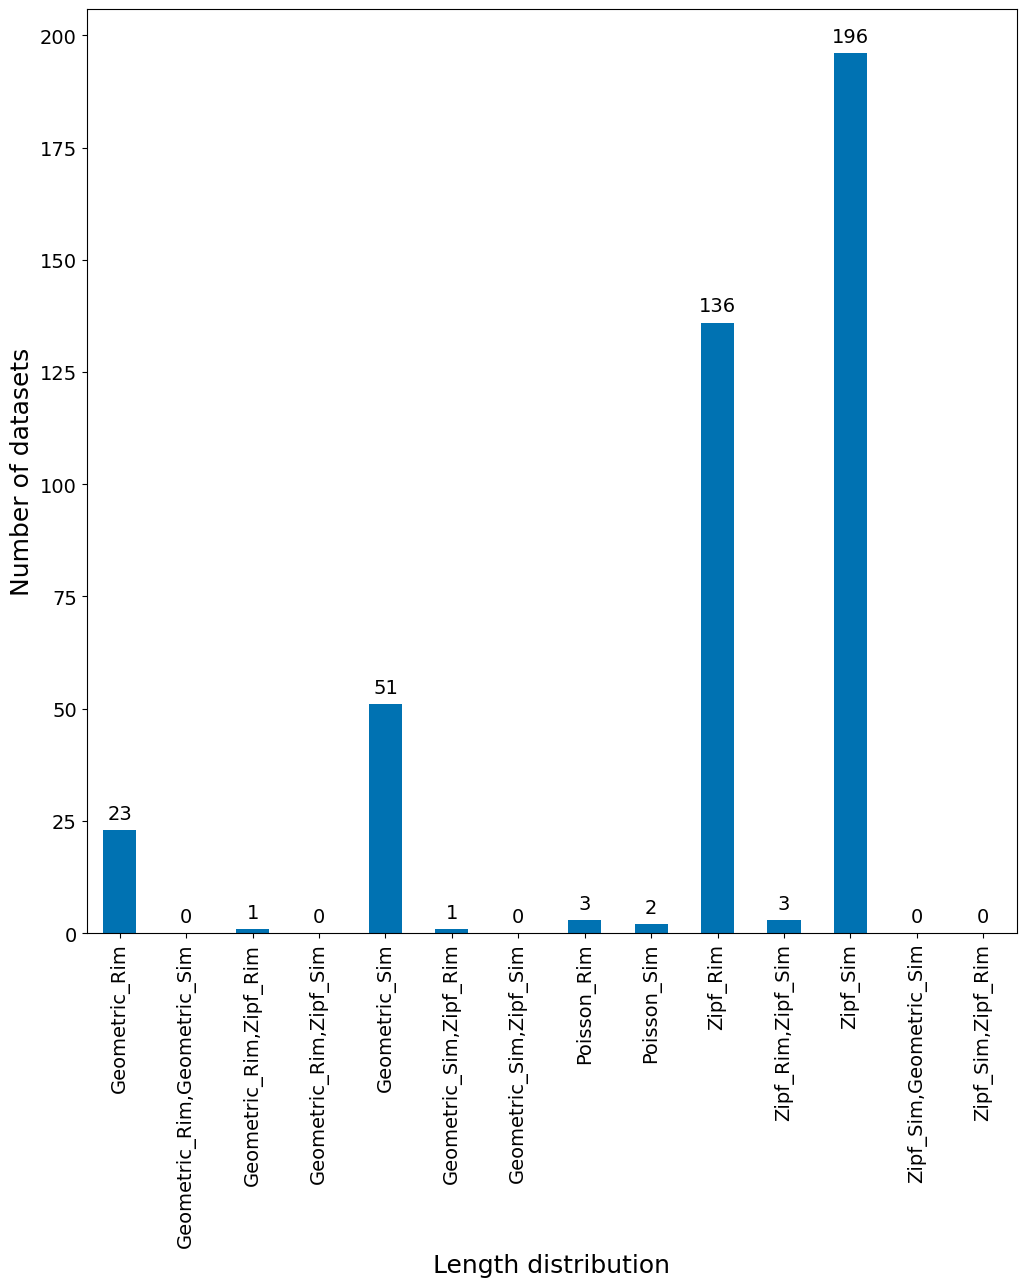

In [137]:
# summary_res.to_csv(f"true_epsilon_summary_{dataset}.csv")
fig, ax = plt.subplots(figsize=(12, 12))
summary_res.plot(kind="bar", ax=ax)
labels = [l.title() for l in summary_res.index]

plt.yticks( size=14)
plt.xticks(ax.get_xticks(),labels=labels, rotation=90, size=14)

plt.ylabel("Number of datasets", size=18)
plt.xlabel("Length distribution", size=18)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', size=14)


plt.savefig(f"{dataset}_hist_{corrected}.svg", bbox_inches="tight", dpi=200)